# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress
import os
import json
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | clarksdale
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | quelimane
Processing Record 4 of Set 1 | korla
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | curup
Processing Record 7 of Set 1 | ascencion de guarayos
City not found. Skipping...
Processing Record 8 of Set 1 | dampit
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | iquitos
Processing Record 11 of Set 1 | talnakh
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | uryv-pokrovka
Processing Record 14 of Set 1 | enewetak
Processing Record 15 of Set 1 | constantia
Processing Record 16 of Set 1 | anadyr
Processing Record 17 of Set 1 | aasiaat
Processing Record 18 of Set 1 | mili
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | dourbali
Processing Record 21 of Set 1 | saipan
Processing Record 22 of Set 1 | viligili
City no

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,clarksdale,34.2001,-90.5709,6.62,84,0,2.06,US,1708417012
1,adamstown,-25.0660,-130.1015,25.52,87,45,5.27,PN,1708417013
2,quelimane,-17.8786,36.8883,26.97,94,75,3.93,MZ,1708417013
3,korla,41.7597,86.1469,-2.78,24,100,2.48,CN,1708417014
4,port elizabeth,-33.9180,25.5701,31.17,75,0,4.63,ZA,1708417015


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,clarksdale,34.2001,-90.5709,6.62,84,0,2.06,US,1708417012
1,adamstown,-25.0660,-130.1015,25.52,87,45,5.27,PN,1708417013
2,quelimane,-17.8786,36.8883,26.97,94,75,3.93,MZ,1708417013
3,korla,41.7597,86.1469,-2.78,24,100,2.48,CN,1708417014
4,port elizabeth,-33.9180,25.5701,31.17,75,0,4.63,ZA,1708417015


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

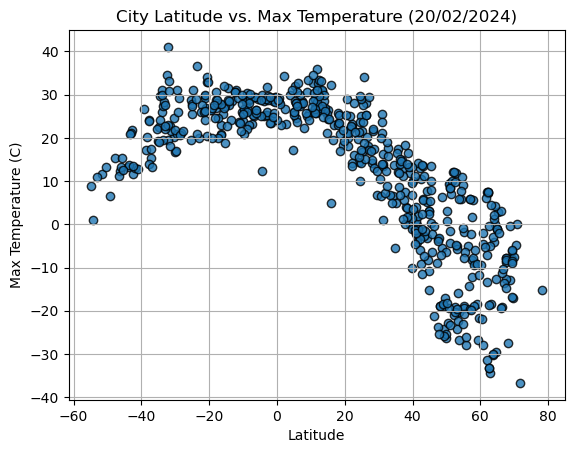

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df = pd.DataFrame(city_data)

# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%d/%m/%Y"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

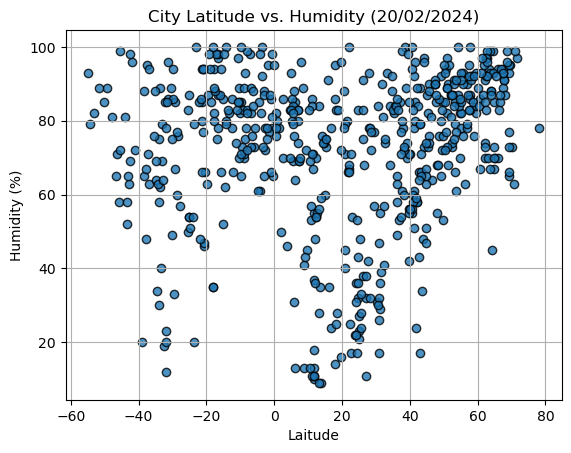

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (%s)" % time.strftime("%d/%m/%Y"))
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

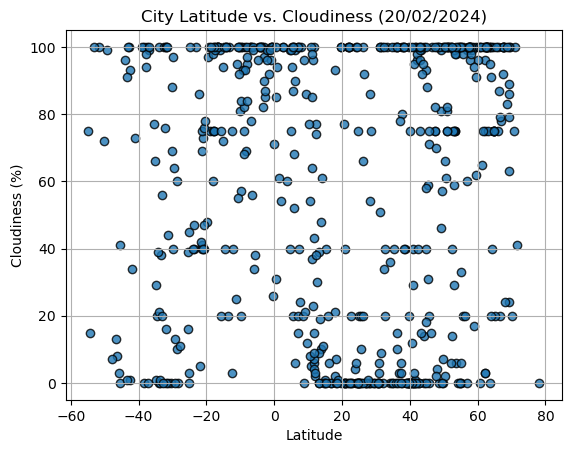

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%d/%m/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

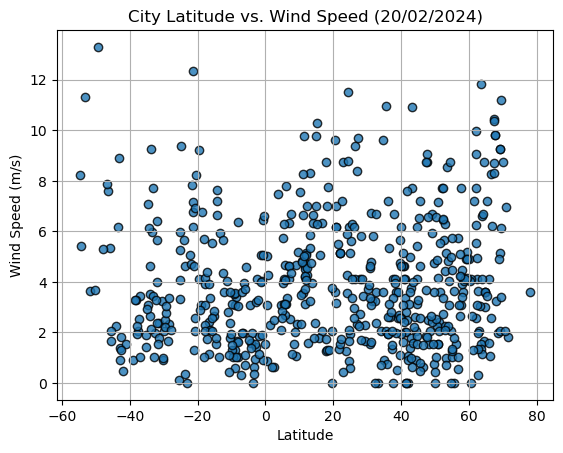

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%d/%m/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    # Calculate the linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
    # Print the r-value
    print(f"The r-value is: {rvalue}")
    

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,clarksdale,34.2001,-90.5709,6.62,84,0,2.06,US,1708417012
3,korla,41.7597,86.1469,-2.78,24,100,2.48,CN,1708417014
9,talnakh,69.4865,88.3972,-17.11,95,100,6.15,RU,1708417018
11,uryv-pokrovka,51.1159,39.1639,-4.34,82,81,2.43,RU,1708417019
12,enewetak,11.3474,162.3373,26.54,71,96,9.78,MH,1708417020


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,adamstown,-25.0660,-130.1015,25.52,87,45,5.27,PN,1708417013
2,quelimane,-17.8786,36.8883,26.97,94,75,3.93,MZ,1708417013
4,port elizabeth,-33.9180,25.5701,31.17,75,0,4.63,ZA,1708417015
5,curup,-3.4667,102.5333,25.26,92,100,0.65,ID,1708417015
6,dampit,-8.2116,112.7493,28.77,78,69,1.67,ID,1708417016


###  Temperature vs. Latitude Linear Regression Plot

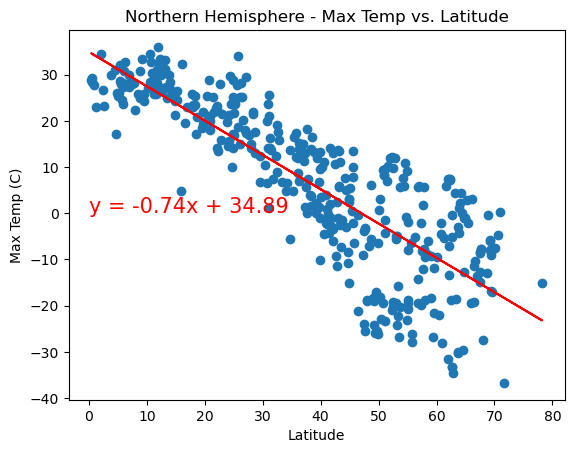

The r-value is: -0.8403191436382996


In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 
                       'Northern Hemisphere - Max Temp vs. Latitude', 
                       'Latitude', 'Max Temp (C)', 
                       (0, 0))

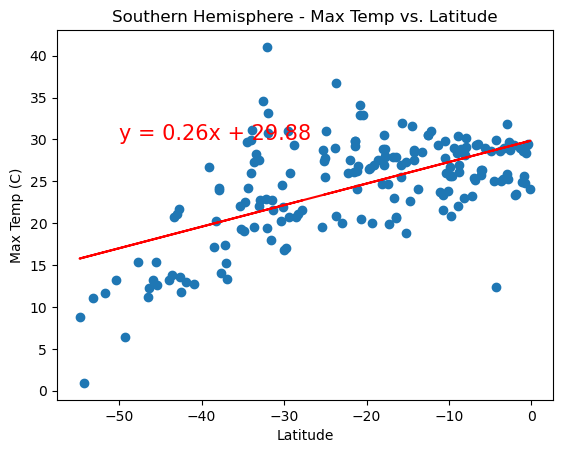

The r-value is: 0.5935777241056831


In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 
                       'Southern Hemisphere - Max Temp vs. Latitude', 
                       'Latitude', 'Max Temp (C)', 
                       (-50, 30))

**Discussion about the linear relationship:** 
- Northern Hemisphere: The strong negative r-value of -0.8403191436382996 along with the slope of -0.74 in the regression equation suggests a strong, inverse relationship between latitude and maximum temperature. As one moves further from the equator (increasing latitude), maximum temperatures tend to decrease significantly. The relatively high absolute value of the r-value indicates a strong correlation and that latitude is a good predictor of maximum temperature in the Northern Hemisphere.
- Southern Hemisphere: The moderate positive r-value of 0.5935777241056831 combined with the slope of 0.26 indicates a moderate direct relationship between latitude and maximum temperature. As one moves closer to the equator (increasing latitude values, since the Southern Hemisphere has negative latitude values), maximum temperatures tend to increase. The moderate r-value suggests that while there is a correlation, other factors may also be influencing maximum temperatures.

The scatter plots reflect these relationships with a tight clustering around the regression line in the Northern Hemisphere, indicating less variability in the relationship between latitude and maximum temperature. In contrast, the Southern Hemisphere shows more scatter, suggesting additional factors may have a more pronounced effect on maximum temperature variations.

In summary, latitude appears to be a stronger predictor of maximum temperature in the Northern Hemisphere than in the Southern Hemisphere, as reflected by the respective r-values. The strong correlation in the Northern Hemisphere underscores the significant role of latitude in influencing temperature patterns, whereas the Southern Hemisphere's correlation, while moderate, hints at a more complex interplay of climatic factors.

### Humidity vs. Latitude Linear Regression Plot

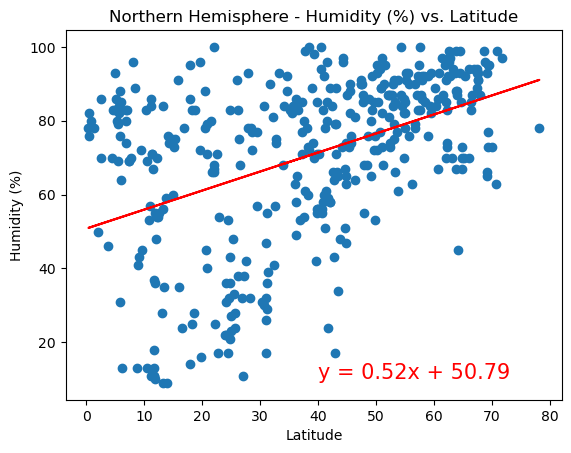

The r-value is: 0.44623666411192864


In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 
                       'Northern Hemisphere - Humidity (%) vs. Latitude', 
                       'Latitude', 'Humidity (%)', 
                       (40, 10))

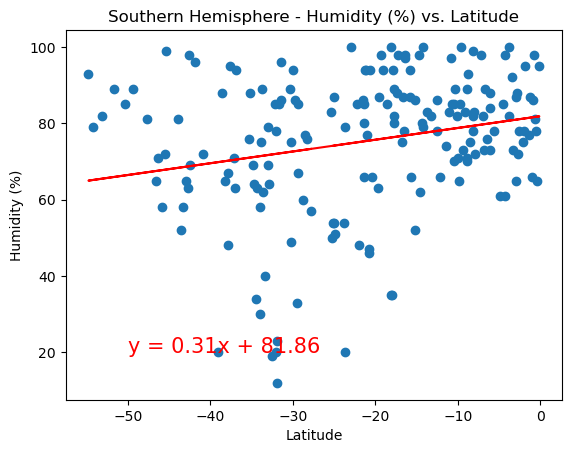

The r-value is: 0.23399392337680777


In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 
                       'Southern Hemisphere - Humidity (%) vs. Latitude', 
                       'Latitude', 'Humidity (%)', 
                       (-50, 20))

**Discussion about the linear relationship:** 
- Northern Hemisphere: The moderate r-value of 0.44623666411192864 and the slope of 0.52 in the regression equation suggest a moderate, direct relationship between latitude and humidity. As one moves away from the equator (increasing latitude), there is a tendency for humidity to increase. The moderate r-value indicates that while there is some correlation, latitude is not a highly strong predictor of humidity, suggesting that other factors also play a significant role in determining humidity levels in the Northern Hemisphere.
- Southern Hemisphere: The weak r-value of 0.23399392337680777 and the slope of 0.31 indicate a weak, direct relationship between latitude and humidity. As one moves closer to the equator (increasing latitude values, since the Southern Hemisphere has negative latitude values), there is a slight tendency for humidity to increase. However, the weak r-value suggests that latitude alone is a relatively poor predictor of humidity levels, and other variables likely have a stronger influence on humidity in the Southern Hemisphere.

The scatter plots for both hemispheres show a wide spread of data points, which reinforces the idea that factors other than latitude are influencing humidity levels. In the Northern Hemisphere, despite the moderate correlation, the variability is significant, implying complex interactions between latitude and other climatic or geographic factors. In the Southern Hemisphere, the low r-value coupled with the spread of data points suggests even less influence of latitude on humidity, with other factors playing a more dominant role.

Overall, while there is a positive correlation between latitude and humidity in both hemispheres, the relationships are not strong. This indicates that predicting humidity levels based solely on latitude would not be very accurate, and other meteorological and environmental variables need to be considered.

### Cloudiness vs. Latitude Linear Regression Plot

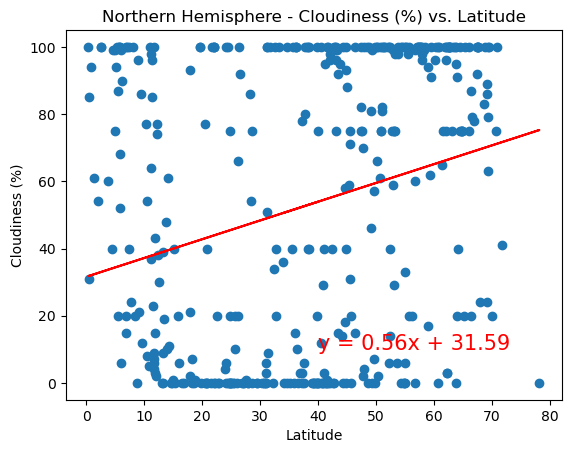

The r-value is: 0.2599233988723471


In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 
                       'Northern Hemisphere - Cloudiness (%) vs. Latitude', 
                       'Latitude', 'Cloudiness (%)', 
                       (40, 10))

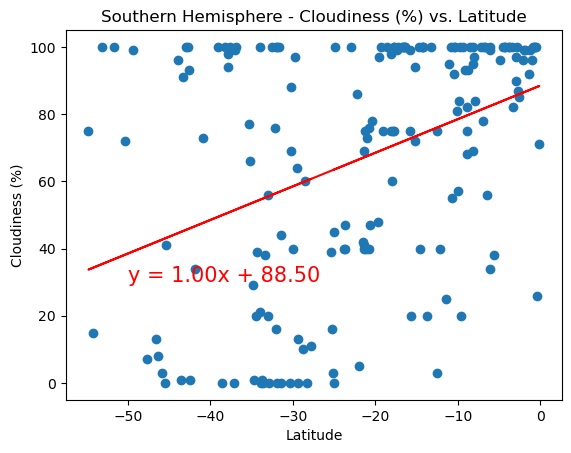

The r-value is: 0.3913991358827645


In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 
                       'Southern Hemisphere - Cloudiness (%) vs. Latitude', 
                       'Latitude', 'Cloudiness (%)', 
                       (-50, 30))

**Discussion about the linear relationship:** 
- Southern Hemisphere: The moderate r-value of 0.3913991358827645 and the slope of 1.00 in the regression equation suggest a moderate, direct relationship where cloudiness increases more distinctly with proximity to the equator.
- Northern Hemisphere: The weaker r-value of 0.2599233988723471 and the smaller slope of 0.56 indicate a weaker, less consistent relationship between cloudiness and latitude.

In both hemispheres, there is a positive correlation between latitude and cloudiness, but it is stronger in the Southern Hemisphere than in the Northern Hemisphere. The scatter in both plots suggests that other factors likely influence cloudiness, as the data points are widely spread, indicating a lot of variability that is not captured by latitude alone.

Despite these correlations, the r-values suggest that latitude is not a strong predictor of cloudiness in either hemisphere. It's likely that cloudiness is influenced by a complex interplay of factors, including atmospheric circulation patterns, ocean currents, and local geographical features, which are not accounted for in a simple linear model based on latitude. Additional investigation would be required to fully understand the factors affecting cloudiness in these regions.

### Wind Speed vs. Latitude Linear Regression Plot

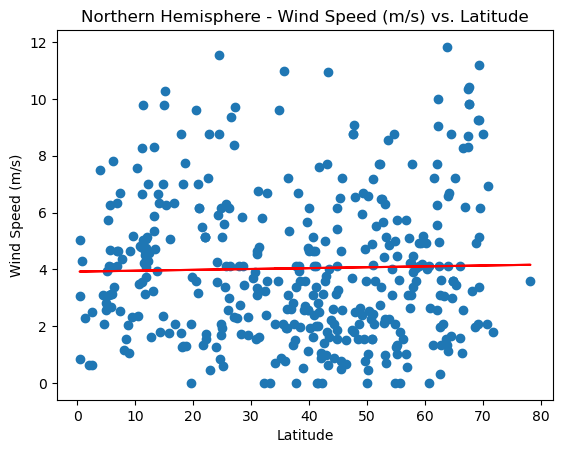

The r-value is: 0.023541626556705237


In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 
                       'Northern Hemisphere - Wind Speed (m/s) vs. Latitude', 
                       'Latitude', 'Wind Speed (m/s)', 
                       (0, 25))

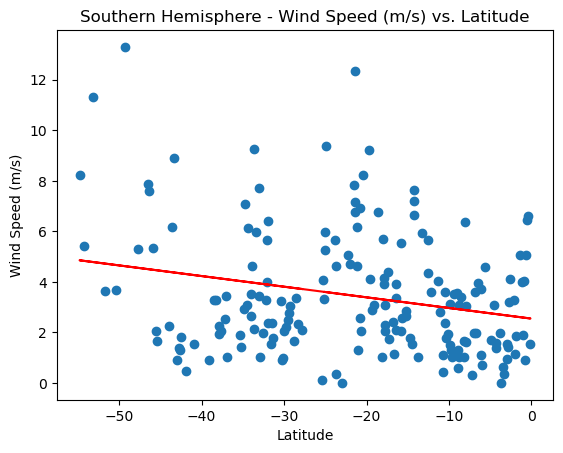

The r-value is: -0.24237008488988185


In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 
                       'Southern Hemisphere - Wind Speed (m/s) vs. Latitude', 
                       'Latitude', 'Wind Speed (m/s)', 
                       (-50, 20))

**Discussion about the linear relationship:** 
- Northern Hemisphere: The very low r-value of 0.023541626556705237 suggests that there is virtually no linear relationship between latitude and wind speed in the Northern Hemisphere. The data points are widely scattered and the regression line is nearly horizontal, indicating that changes in latitude do not correspond to consistent changes in wind speed. The implication is that other factors, likely geographical features, atmospheric pressure differences, and local weather systems, play a more significant role in determining wind speed than latitude does in this region.
- Southern Hemisphere: The weak negative r-value of -0.24237008488988185 indicates a slight inverse relationship between latitude and wind speed. This means that as one moves closer to the equator, there is a very slight tendency for wind speeds to decrease. However, the relationship is weak and suggests that, similar to the Northern Hemisphere, latitude is not a strong predictor of wind speed in the Southern Hemisphere. The scatter plot reinforces this with a broad distribution of data points, which does not suggest a strong linear trend.

For both hemispheres, the low absolute value of the r-values and the visual dispersion of the data points on the scatter plots demonstrate that wind speed variability is not well explained by latitude alone. These findings imply that wind patterns are influenced by complex interactions of multiple factors, and latitude is not a dominant variable in this aspect of climate behavior.